Choose 3 datasets which are available on e.g.:
- UCI repository https://archive.ics.uci.edu/ml/index.php
- OpenML repository https://www.openml.org/

related to binary classiffcation problem.

Please only focus on datasets with numerical features.

In [1]:
import numpy as np

np.random.seed(1337)

from preapring_datasets import (
    read_iris_data,
    read_abalone_data,
    read_diabetes_data
)

datasets = {
    "iris": read_iris_data(),
    "abalone": read_abalone_data(),
    "diabetic": read_diabetes_data()
    }


Compare LDA, QDA, and NB.

Split data into training set and test set.

Train the model on the train set and compute accuracy on the test set. 

Repeat the experiment for different train/test splits and generate boxplots showing the values of accuracy for each method.

Save the results for three datasets in the file BayesianReal.pdf

In [2]:
import matplotlib.pyplot as plt

from BinaryClassifiers import LDA, QDA, NaiveBayes
from tools import train_test_split


In [3]:
models = (LDA, QDA, NaiveBayes)


In [4]:
# One iteration. Data split 8:2

for dataset_name, dataset in datasets.items():
    print("Dataset: ", dataset_name)
    print("Records: ", dataset.shape[0])
    print("Features:", dataset.shape[1]-1)
    print()
    np.random.shuffle(dataset)

    train, test = train_test_split(dataset, 0.8)
    for model in models:
        model_instance = model()
        model_instance.fit(train[:, :-1], train[:, -1])

        all_count = 0
        good_count = 0
        for record in test:
            y = record[-1]
            x = record[:-1]

            y_pred = model_instance.predict(x)

            if y == y_pred:
                good_count += 1
            all_count += 1
        acc = round(good_count/all_count*100, 2)
        print(f"{model.name:11} - {acc:6} %")
    print(f"{'-'*20}\n")


Dataset:  iris
Records:  100
Features: 4

LDA         -  100.0 %
QDA         -  100.0 %
Naive Bayes -   90.0 %
--------------------

Dataset:  abalone
Records:  4177
Features: 8

LDA         -  83.13 %
QDA         -  78.23 %
Naive Bayes -  55.98 %
--------------------

Dataset:  diabetic
Records:  253680
Features: 21

LDA         -  61.18 %
QDA         -  62.14 %
Naive Bayes -  60.14 %
--------------------



In [5]:
results = {
    dataset_name: {
        model.name: []
        for model in models
    }
    for dataset_name in datasets
}

for dataset_name, dataset in datasets.items():
    np.random.shuffle(dataset)

    for data_split in (0.5, 0.6, 0.7, 0.8, 0.9):
        train, test = train_test_split(dataset, data_split)
        for model in models:
            model_instance = model()
            model_instance.fit(train[:, :-1], train[:, -1])

            all_count = 0
            good_count = 0
            for record in test:
                y = record[-1]
                x = record[:-1]

                y_pred = model_instance.predict(x)

                if y == y_pred:
                    good_count += 1
                all_count += 1
            acc = round(good_count/all_count*100, 2)

            results[dataset_name][model_instance.name].append(acc)


In [6]:
results


{'iris': {'LDA': [94.0, 95.0, 96.67, 95.0, 90.0],
  'QDA': [94.0, 95.0, 96.67, 95.0, 90.0],
  'Naive Bayes': [94.0, 97.5, 96.67, 95.0, 90.0]},
 'abalone': {'LDA': [83.68, 83.72, 83.65, 82.18, 80.38],
  'QDA': [77.98, 78.82, 78.95, 78.83, 78.71],
  'Naive Bayes': [57.3, 56.31, 56.7, 56.82, 57.89]},
 'diabetic': {'LDA': [61.07, 61.15, 61.19, 61.32, 60.77],
  'QDA': [62.25, 62.34, 62.46, 62.57, 62.24],
  'Naive Bayes': [59.95, 60.15, 60.32, 60.4, 59.95]}}

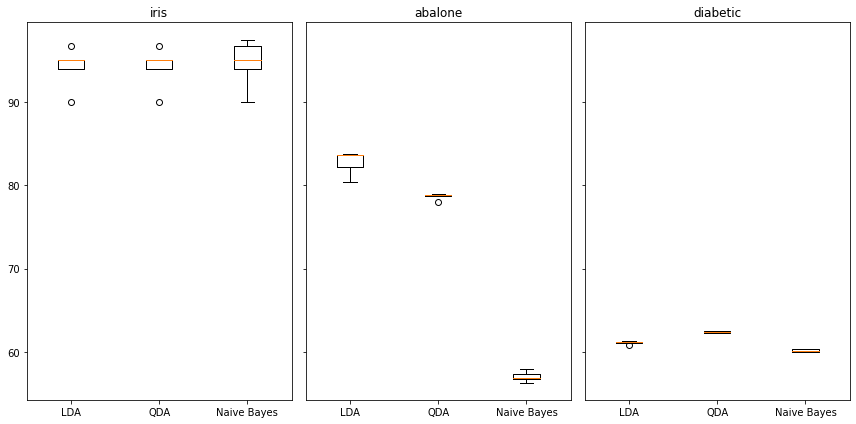

In [11]:
def draw_boxplots(results):
    _, axes = plt.subplots(nrows=1, ncols=len(results), figsize=(12, 6), sharey=True)
    
    for ax, (dataset_name, models) in zip(axes, results.items()):
        data = [np.array(models[model_name]) for model_name in models]
        ax.boxplot(data)
        ax.set_title(dataset_name)
        ax.set_xticks(range(1, len(models) + 1))
        ax.set_xticklabels(models.keys())

    plt.tight_layout()
    plt.savefig("plots/custom_datasets.png")
    plt.show()

draw_boxplots(results)


For the simple Iris dataset, all classifiers are similarly good and achieve close to 100% efficiency (one category was cut because we need only two).

For the Abalone dataset, I averaged the ages. Since the classifier is binary, the task is to predict whether age is below or above average, rather than estimating an exact number. In this case, the LDA model turned out to be surprisingly better than QDA. Naive Bayes is clearly worse.

For the Diabetic set, the task is to estimate the person's gender based on medical data. The task was a pure experiment without much expectation, but all classifiers turned out to be better than the random model by 10 percentage points.
